In [14]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
import seaborn as sns
from scipy import stats
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('lab4.csv')
df.drop(['ID', 'Unnamed: 0'], axis='columns', inplace=True)
df_new = df.copy()
df.shape

(10868, 259)

In [3]:
z = np.abs(stats.zscore(df))
df = df_new[(z < 3).all(axis=1)]
df.shape

(8061, 259)

In [4]:
y = df['Class']
y.shape

(8061,)

In [5]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
y = np_utils.to_categorical(encoded_Y)
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
X = df.drop(['Class'], axis='columns')
Y = df['Class']
X.head()

,0,1,2,3,4,5,6,7,8,9,...,f8,f9,fa,fb,fc,fd,fe,ff,??,size
3,21091,1213,726,817,1257,625,550,523,1078,473,...,873,485,462,516,1133,471,761,7998,13940,0.574219
4,19764,710,302,433,559,410,262,249,422,223,...,947,350,209,239,653,221,242,2199,9008,0.370850
5,85090,414,340,331,350,324,303,299,327,364,...,305,295,333,344,325,332,321,403,60984,0.669922
8,33141,430,311,410,411,330,385,863,345,378,...,333,312,272,279,295,300,334,12186,25352,0.502441
11,12369,2317,2111,2210,2087,2120,2106,2186,2424,1971,...,2001,2056,1977,2086,2223,2019,2025,3193,16272,1.686768


In [7]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

### Applying Keras Model

In [35]:
# define the keras model
model = Sequential()
model.add(Dense(350, input_dim=258, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(9, activation='softmax'))

In [36]:
# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=150, batch_size=250, verbose=0, validation_split=0.2)

In [38]:
# evaluate the keras model on train set
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

202/202 [==============================] - 0s 1ms/step - loss: 0.0391 - accuracy: 0.9941
Accuracy: 99.41


In [95]:
# evaluate the keras model on test set
_, accuracy_keras = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy_keras*100))

51/51 [==============================] - 0s 2ms/step - loss: 0.2001 - accuracy: 0.9783
Accuracy: 97.83


In [40]:
predictions = model.predict_classes(X)

##### Confusion Matrix

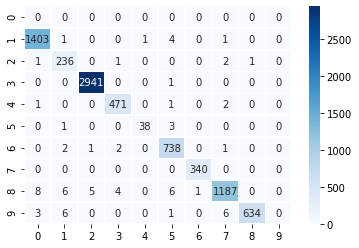

In [113]:
cm = confusion_matrix(y_true=Y, y_pred=predictions)
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap='Blues')

In [42]:
pred = model.predict(X_test)
pred.argmax(axis=-1)

array([2, 7, 5, ..., 3, 2, 2])

### Decision Tree Classifier

In [9]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, Y, test_size=0.20, random_state=42, stratify=Y)

In [10]:
dtree_model = DecisionTreeClassifier(max_depth=15).fit(X_train_dt, y_train_dt)

In [11]:
dtree_model.score(X_train_dt,y_train_dt)

0.9984491315136477

In [46]:
dtree_predictions = dtree_model.predict(X_test_dt) 
dtree_predictions

array([1, 9, 1, ..., 9, 3, 4])

In [96]:
accuracy_DecisionTree = dtree_model.score(X_test_dt,y_test_dt)
accuracy_DecisionTree

0.9454432734035958

##### Confusion Matrix

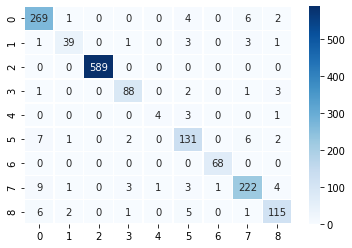

In [112]:
cm = confusion_matrix(y_test_dt, dtree_predictions)
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap='Blues')

### SVM (Support vector machine) classifier –

In [49]:
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, Y, test_size=0.20, random_state=42, stratify=Y)

In [71]:
# training a linear SVM classifier 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train_svm, y_train_svm)

In [72]:
# model accuracy for X_test 
train_accuracy = svm_model_linear.score(X_train_svm, y_train_svm)
train_accuracy

0.9928660049627791

In [73]:
svm_predictions = svm_model_linear.predict(X_test_svm)
svm_predictions

array([1, 9, 1, ..., 6, 3, 4])

In [97]:
# model accuracy for X_test 
accuracy_svc = svm_model_linear.score(X_test_svm, y_test_svm)
accuracy_svc

0.9646621202727836

##### Confusion Matrix

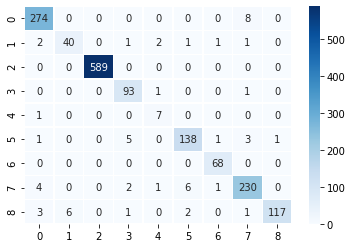

In [111]:
# creating a confusion matrix 
cm = confusion_matrix(y_test_svm, svm_predictions)
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap='Blues')

### Naive Bayes classifier –

In [82]:
X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = train_test_split(X, Y, test_size=0.20, random_state=42, stratify=Y)

In [83]:
# training a Naive Bayes classifier 
gnb = GaussianNB().fit(X_train_gnb, y_train_gnb) 

In [86]:
# accuracy on Train 
train_accuracy = gnb.score(X_train_gnb, y_train_gnb) 
train_accuracy 

0.7194478908188585

In [87]:
gnb_predictions = gnb.predict(X_test) 

In [98]:
# accuracy on X_test 
accuracy_gnb = gnb.score(X_test_gnb, y_test_gnb) 
accuracy_gnb

0.7253564786112833

##### Confusion Matrix

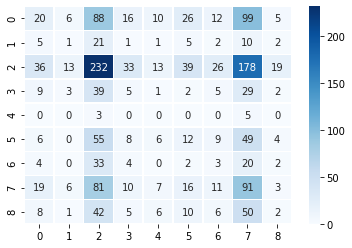

In [110]:
# creating a confusion matrix 
cm = confusion_matrix(y_test_gnb, gnb_predictions)
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap='Blues')

### Result

In [114]:
result = np.array([['KerasClassifier: Accuracy-', round(accuracy_keras,2)],
                   ['DecisionTreeClassifier: Accuracy-', round(accuracy_DecisionTree,2)],
                   ['SVC Classifier: Accuracy-', round(accuracy_svc,2)],
                   ['GaussianNBClassifier: Accuracy-', round(accuracy_gnb,2)],
                  ])
print(result)

[['KerasClassifier: Accuracy-' '0.98']
 ['DecisionTreeClassifier: Accuracy-' '0.95']
 ['SVC Classifier: Accuracy-' '0.96']
 ['GaussianNBClassifier: Accuracy-' '0.73']]
